In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("../data/Blogs_result/dataset.csv")

In [3]:
columns = df.columns

for column in columns:
    print(column)

Text
Class


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4528 entries, 0 to 4527
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    4528 non-null   object
 1   Class   4528 non-null   object
dtypes: object(2)
memory usage: 70.9+ KB


In [6]:
df['Text'].fillna('', inplace=True)

# Verteilung der Kategorien

Index(['News', 'Blog', 'Literature', 'Political speech', 'Jurisdiction'], dtype='object', name='Class')


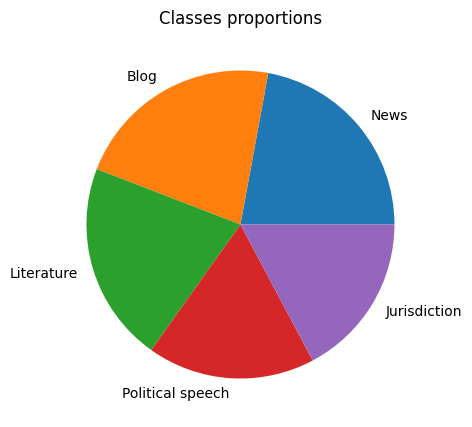

In [9]:
label_count = df['Class'].value_counts()

print(label_count.index)

plt.figure(figsize=(5,5))
plt.pie(label_count.values, labels=label_count.index)
plt.title('Classes proportions')
plt.show()

# Modelltraining: SVM

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Class'], test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Create and train the SVM classifier
svm = SVC()
svm.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test_vectorized)

# Evaluate the model
print(classification_report(y_test, y_pred))


                  precision    recall  f1-score   support

            Blog       0.96      0.91      0.94       186
    Jurisdiction       0.99      0.99      0.99       156
      Literature       0.98      0.97      0.97       180
            News       0.93      0.95      0.94       217
Political speech       0.95      0.98      0.96       167

        accuracy                           0.96       906
       macro avg       0.96      0.96      0.96       906
    weighted avg       0.96      0.96      0.96       906



# Modelltraining: K-Nearest Neighbor

In [13]:
labels = df['Class']

X_train, X_test, y_train, y_test = train_test_split(df['Text'], labels, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


k = 5 
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train_tfidf, y_train)

y_pred = knn_model.predict(X_test_tfidf)

print(classification_report(y_test, y_pred))


                  precision    recall  f1-score   support

            Blog       0.87      0.70      0.78       186
    Jurisdiction       0.96      0.78      0.86       156
      Literature       0.84      0.52      0.64       180
            News       0.97      0.64      0.77       217
Political speech       0.44      1.00      0.62       167

        accuracy                           0.72       906
       macro avg       0.82      0.73      0.73       906
    weighted avg       0.82      0.72      0.73       906



# Modelltraining: Naive Bayes

In [14]:
labels = df['Class']

X_train, X_test, y_train, y_test = train_test_split(df['Class'], labels, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_tfidf, y_train)

y_pred = naive_bayes_model.predict(X_test_tfidf)

print(classification_report(y_test, y_pred))


                  precision    recall  f1-score   support

            Blog       1.00      1.00      1.00       186
    Jurisdiction       1.00      1.00      1.00       156
      Literature       1.00      1.00      1.00       180
            News       1.00      1.00      1.00       217
Political speech       1.00      1.00      1.00       167

        accuracy                           1.00       906
       macro avg       1.00      1.00      1.00       906
    weighted avg       1.00      1.00      1.00       906

